In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import librosa
import librosa.display

import IPython.display as ipd

import sklearn

In [86]:
audio_path = '../wavfiles/classical/classical.00038.wav'
x , sr = librosa.load(audio_path)
ipd.Audio(audio_path)

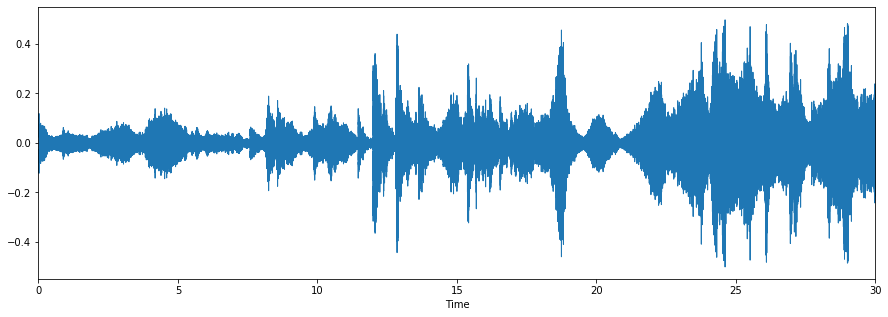

In [87]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(x, sr=sr)

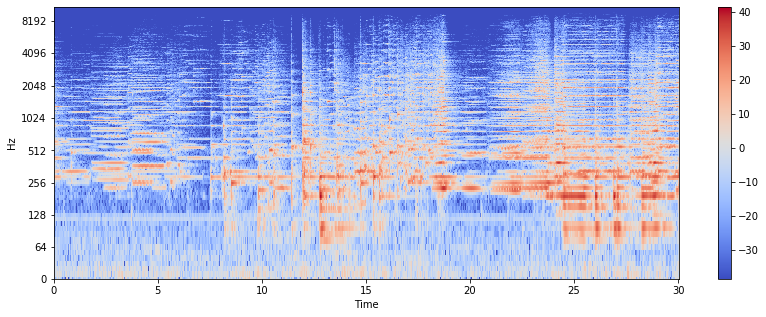

In [88]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

<h1>Feature extraction<h1>

In [89]:
zero_crossings = librosa.zero_crossings(x, pad=False)
print(zero_crossings)
print(sum(zero_crossings))

[False False False ... False False False]
50274


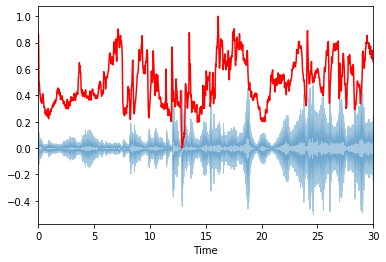

In [90]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]

# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

(20, 1293)


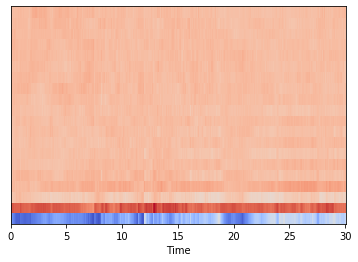

In [91]:
mfccs = librosa.feature.mfcc(x, sr)
print (mfccs.shape)

#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

-2.2422041e-08


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:189: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


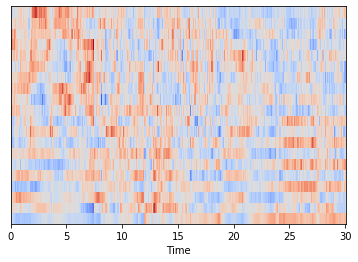

In [92]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(np.mean(mfccs))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [99]:
def mean_mfccs(audio_path):
    x , sr = librosa.load(audio_path)
    mfccs = librosa.feature.mfcc(x, sr)
    #mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
    return np.mean(mfccs)

In [100]:
#blues
print("blues :{blues}".format(blues=mean_mfccs('../wavfiles/blues/blues.00038.wav')))

#classical
print("classical :{classical}".format(classical=mean_mfccs('../wavfiles/classical/classical.00038.wav')))

#country
print("country :{country}".format(country=mean_mfccs('../wavfiles/country/country.00038.wav')))

#disco
print("disco :{disco}".format(disco=mean_mfccs('../wavfiles/disco/disco.00038.wav')))

#hiphop
print("hiphop :{hiphop}".format(hiphop=mean_mfccs('../wavfiles/hiphop/hiphop.00038.wav')))

#jazz
print("jazz :{jazz}".format(jazz=mean_mfccs('../wavfiles/jazz/jazz.00038.wav')))

#metal
print("metal :{metal}".format(metal=mean_mfccs('../wavfiles/metal/metal.00038.wav')))

#pop
print("pop :{pop}".format(pop=mean_mfccs('../wavfiles/pop/pop.00038.wav')))

#reggae
print("reggae :{reggae}".format(reggae=mean_mfccs('../wavfiles/reggae/reggae.00038.wav')))

#rock
print("rock :{rock}".format(rock=mean_mfccs('../wavfiles/rock/rock.00038.wav')))


blues :-8.523051261901855
classical :-10.752452850341797
country :-0.9077143669128418
disco :-1.272768497467041
hiphop :2.0951919555664062
jazz :-3.564321517944336
metal :-1.250483512878418
pop :4.532975196838379
reggae :-4.5583415031433105
rock :4.750197887420654


0.4703927


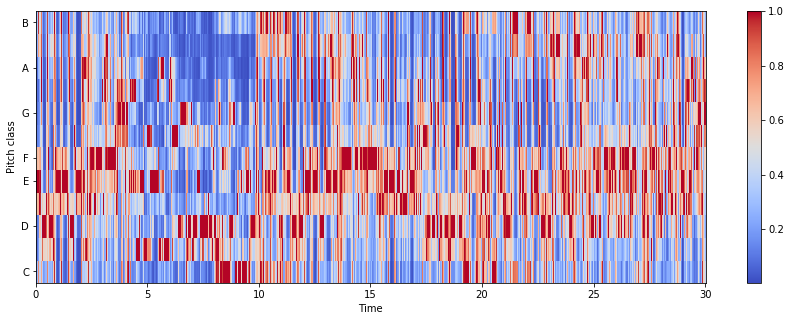

In [129]:
#Loading the file
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
print(np.mean(chromagram))
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.colorbar()

In [39]:
def mean_chroma(audio_path):
    x , sr = librosa.load(audio_path)

    hop_length = 512
    chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
    return np.mean(chromagram)

In [133]:
#blues
print(mean_chroma('../wavfiles/blues/blues.00038.wav'))

#classical
print(mean_chroma('../wavfiles/classical/classical.00038.wav'))

#country
print(mean_chroma('../wavfiles/country/country.00038.wav'))

#disco
print(mean_chroma('../wavfiles/disco/disco.00038.wav'))

#hiphop
print(mean_chroma('../wavfiles/hiphop/hiphop.00038.wav'))

#jazz
print(mean_chroma('../wavfiles/jazz/jazz.00038.wav'))

#metal
print(mean_chroma('../wavfiles/metal/metal.00038.wav'))

#pop
print(mean_chroma('../wavfiles/pop/pop.00038.wav'))

#reggae
print(mean_chroma('../wavfiles/reggae/reggae.00038.wav'))

#rock
print(mean_chroma('../wavfiles/rock/rock.00038.wav'))

0.2658881
0.29441854
0.36740872
0.37060204
0.39833966
0.28566554
0.4703927
0.40041134
0.37370637
0.4115391


In [19]:
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
print(genres)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [35]:
##blues
all_songs = []

for genre in genres:
    
    songs = [genre + '.' + format(k, '05d') + '.wav'for k in range(100)]
    all_songs = all_songs + songs
print(all_songs)

['blues.00000.wav', 'blues.00001.wav', 'blues.00002.wav', 'blues.00003.wav', 'blues.00004.wav', 'blues.00005.wav', 'blues.00006.wav', 'blues.00007.wav', 'blues.00008.wav', 'blues.00009.wav', 'blues.00010.wav', 'blues.00011.wav', 'blues.00012.wav', 'blues.00013.wav', 'blues.00014.wav', 'blues.00015.wav', 'blues.00016.wav', 'blues.00017.wav', 'blues.00018.wav', 'blues.00019.wav', 'blues.00020.wav', 'blues.00021.wav', 'blues.00022.wav', 'blues.00023.wav', 'blues.00024.wav', 'blues.00025.wav', 'blues.00026.wav', 'blues.00027.wav', 'blues.00028.wav', 'blues.00029.wav', 'blues.00030.wav', 'blues.00031.wav', 'blues.00032.wav', 'blues.00033.wav', 'blues.00034.wav', 'blues.00035.wav', 'blues.00036.wav', 'blues.00037.wav', 'blues.00038.wav', 'blues.00039.wav', 'blues.00040.wav', 'blues.00041.wav', 'blues.00042.wav', 'blues.00043.wav', 'blues.00044.wav', 'blues.00045.wav', 'blues.00046.wav', 'blues.00047.wav', 'blues.00048.wav', 'blues.00049.wav', 'blues.00050.wav', 'blues.00051.wav', 'blues.0005

In [106]:
def data_set():
    features_genres = []
    all_songs = []
    all_mean_mfccs = []
    all_mean_chroma = []
    features_names = ['song' , 'mean_mfccs' , 'mean_chroma' , 'genre']
    for genre in genres:
        songs = []
        for k in range(100):
            features = []
            song = genre + '.' + format(k, '05d') + '.wav'
            song_url = '../wavfiles/' + genre + '/' + song
            features_genres.append(genre)
            all_mean_mfccs.append(mean_mfccs(song_url))
            all_mean_chroma.append(mean_chroma(song_url))
            songs.append(song)
        all_songs = all_songs + songs

    df = pd.DataFrame({features_names[0] : all_songs , features_names[1] : all_mean_mfccs , features_names[2] : all_mean_chroma, features_names[3] : features_genres })
    return df

In [107]:
#writer = csv.writer(file)
#writer.writerow([{feature1},{feature2},....])

In [108]:
data_set = data_set()

In [109]:
data_set

,song,mean_mfccs,mean_chroma,genre
0,blues.00000.wav,1.938016,0.350088,blues
1,blues.00001.wav,-0.055611,0.340914,blues
2,blues.00002.wav,1.034164,0.363637,blues
3,blues.00003.wav,0.071344,0.404785,blues
4,blues.00004.wav,-8.458839,0.308526,blues
...,...,...,...,...
995,rock.00095.wav,-1.724619,0.352063,rock
996,rock.00096.wav,-1.761153,0.398687,rock
997,rock.00097.wav,-2.664267,0.432142,rock
998,rock.00098.wav,-2.238330,0.362485,rock
